In [1]:
import daspi as dsp
DPI = 120
dsp.__version__

'0.5.0'

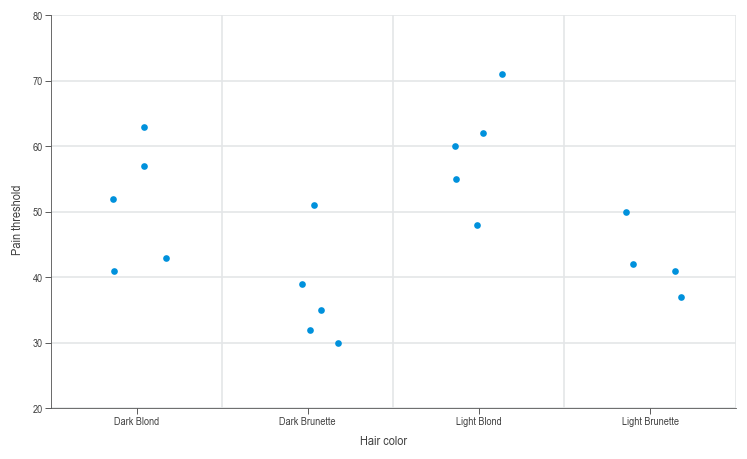

In [2]:
import daspi as dsp

df = dsp.load_dataset('anova')
chart = dsp.SingleChart(
        source=df,
        target='Pain threshold',
        feature='Hair color',
        categorical_feature=True,
    ).plot(
        dsp.Jitter
    ).label(
        feature_label=True,
        target_label=True,
    )

chart.save('docs/img/anova_jitter_pain-color.png', dpi=DPI)

In [3]:
model = dsp.LinearModel(df, 'Pain threshold', ['Hair color'])
model.fit()
model.anova()

Typ-II,DF,SS,MS,F,p,n2
Source,,,,,,
Hair color,3,1360.726316,453.575439,6.791407,0.004114,0.575962
Residual,15,1001.800000,66.786667,NaN,NaN,0.424038


In [4]:
x_bar_group = df.groupby('Hair color')['Pain threshold'].mean()
x_bar = df['Pain threshold'].mean()
(x_bar_group - x_bar).abs()

Hair color
Dark Blond         3.357895
Dark Brunette     10.442105
Light Blond       11.357895
Light Brunette     5.342105
Name: Pain threshold, dtype: float64

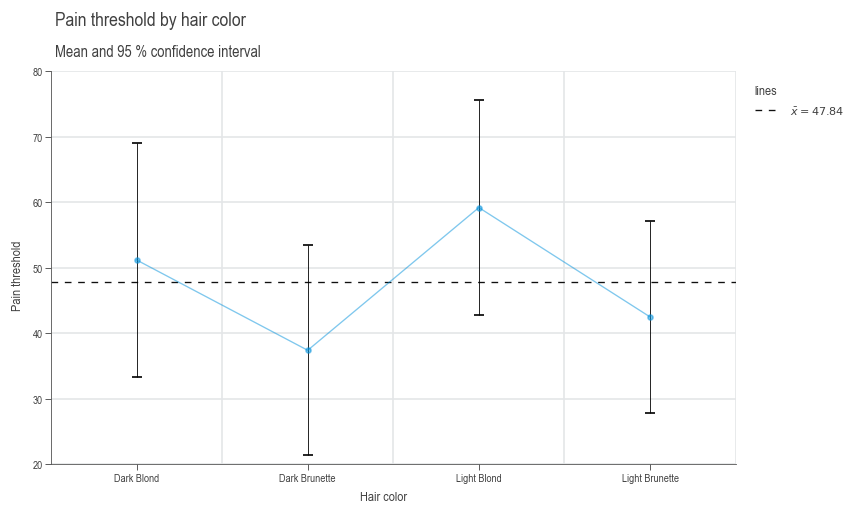

In [6]:
LEVEL = 0.95
n_groups = df.groupby(['Hair color']).ngroups
chart = dsp.SingleChart(
        source=df,
        target='Pain threshold',
        feature='Hair color',
        categorical_feature=True,
    ).plot(
        dsp.MeanTest,
        n_groups=n_groups,
        confidence_level=LEVEL,
        show_center=False
    ).plot(
        dsp.CenterLocation
    ).stripes(
        mean=True
    ).label(
        fig_title='Pain threshold by hair color',
        sub_title=f'Mean and {int(100*LEVEL)} % confidence interval',
        feature_label=True,
        target_label=True,
    )

chart.save('docs/img/anova_mean-ci_pain-color.png', dpi=DPI)

In [7]:
model.uncertainty

8.172310974667244

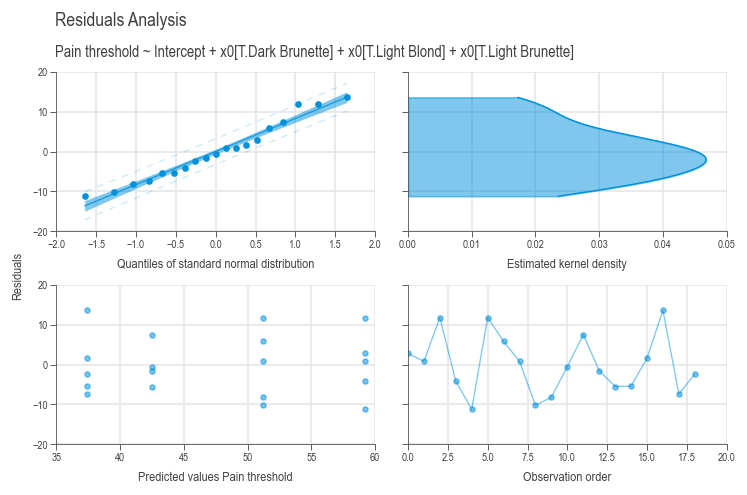

In [9]:
chart = dsp.ResidualsCharts(model).plot().label()

chart.save('docs/img/anova_residues_pain-color.png', dpi=DPI)